<a href="https://colab.research.google.com/github/tortas/Video-Game-Data-Exploration/blob/master/VGame_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from google.colab import files
uploaded = files.upload()

Saving vgsalesGlobale.csv to vgsalesGlobale (3).csv


In [0]:
vg_sales = pd.read_csv('vgsalesGlobale.csv')
vg_sales = vg_sales.fillna(value={'Publisher': 'Unknown'})

In [0]:
vg_sales = vg_sales.dropna()
vg_sales['Year'] = vg_sales['Year'].astype(int)

In [79]:
vg_sales.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [114]:
year_groups = vg_sales[(vg_sales.Year < 2017) & (vg_sales.Year > 2011)].groupby(['Year', 'Genre'])
year_genre_df = year_groups.sum()
year_genre_df = year_genre_df.drop(columns='Rank')
year_genre_df.head(15)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year Genre                                                                
2012 Action           52.51     42.78     12.30        14.36        122.04
     Adventure         1.78      1.31      2.42         0.44          5.99
     Fighting          4.34      2.43      1.79         0.97          9.51
     Misc             10.99      6.63      3.66         1.65         22.92
     Platform          7.32      5.88      3.84         1.52         18.55
     Puzzle            0.30      0.42      0.96         0.06          1.76
     Racing            4.38      7.58      0.20         2.27         14.46
     Role-Playing     17.85     11.97     14.39         3.56         47.81
     Shooter          35.06     26.34      2.62         8.82         72.86
     Simulation        3.09      3.62      5.86         0.80         13.38
     Sports           16.40      8.83      2.59         3.08         30.93
     Strategy          0.94      0.99      1.11         0.29          3.33
2013 Action           53.79     45.21     10.88        15.33        125.22
     Adventure         1.63      1.97      2.22         0.79          6.61
     Fighting          3.18      1.95      1.28         0.82          7.21

In [113]:
year_genre_df[year_genre_df[2012].Genre == 'Fighting']

KeyError: ignored

In [109]:
unstacked = year_genre_df.unstack()
unstacked

NA_Sales                                                                \
Genre   Action Adventure Fighting   Misc Platform Puzzle Racing Role-Playing   
Year                                                                           
2012     52.51      1.78     4.34  10.99     7.32   0.30   4.38        17.85   
2013     53.79      1.63     3.18  12.53    11.62   0.19   4.21        13.09   
2014     38.73      1.94     6.89   9.43     3.02   0.62   5.86        13.56   
2015     22.83      2.76     3.60   4.81     2.50   0.05   1.97        13.35   
2016      5.87      0.34     1.60   0.22     0.79    NaN   0.33         1.39   

                           ...    Global_Sales                                \
Genre Shooter Simulation   ...        Fighting   Misc Platform Puzzle Racing   
Year                       ...                                                 
2012    35.06       3.09   ...            9.51  22.92    18.55   1.76  14.46   
2013    30.70       2.26   ...            7.21  25.65    25.12   0.99  13.04   
2014    30.72       1.22   ...           16.15  23.68     8.89   1.50  16.69   
2015    30.79       1.13   ...            7.78  11.69     6.05   0.70   7.92   
2016     7.44       0.00   ...            3.86   1.17     2.07    NaN   1.64   

                                                       
Genre Role-Playing Shooter Simulation Sports Strategy  
Year                                                   
2012         47.81   72.86      13.38  30.93     3.33  
2013         44.92   62.80       8.67  41.55     6.33  
2014         45.86   66.00       5.55  46.66     0.99  
2015         36.44   66.15       5.62  41.54     1.82  
2016          6.76   18.22       0.39  14.60     0.50  

[5 rows x 60 columns]

In [110]:
g = sns.catplot(x='Year', y="Global_Sales", hue="Genre", data=unstacked)

ValueError: ignored

In [0]:
unstacked = year_genre_df.unstack()

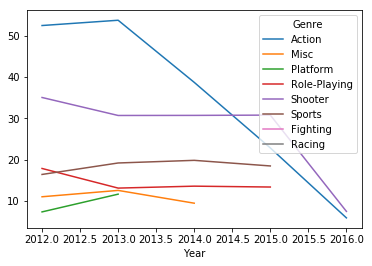

In [101]:
year_genre_df[year_genre_df['NA_Sales'] > 5].unstack().NA_Sales.plot()

In [60]:
year_genre_df['Global_Sales'].head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2012.0,122.04,5.99,9.51,22.92,18.55,1.76,14.46,47.81,72.86,13.38,30.93,3.33
2013.0,125.22,6.61,7.21,25.65,25.12,0.99,13.04,44.92,62.80,8.67,41.55,6.33
2014.0,99.02,6.06,16.15,23.68,8.89,1.50,16.69,45.86,66.00,5.55,46.66,0.99
2015.0,70.70,8.03,7.78,11.69,6.05,0.70,7.92,36.44,66.15,5.62,41.54,1.82
2016.0,19.91,1.81,3.86,1.17,2.07,NaN,1.64,6.76,18.22,0.39,14.60,0.50


In [54]:
pd.wide_to_long(df=year_genre_df, 
                stubnames=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                i=year_genre_df['Year'],
                j='Sales')

KeyError: ignored

In [38]:
g = sns.catplot(x='Year', y="Global_Sales", hue="Genre", data=year_genre_df)

ValueError: ignored